In [1]:
# import packages
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
import sklearn.neighbors
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
import numpy as np


#lemmatization libraries 
import nltk.stem
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# punctuation + stop words libraries:
from nltk.corpus import stopwords
import re, string, timeit

#stemming 
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ophir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ophir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ophir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1(a) Parsing the txt files:

## Question 1(a): Parsing Yelp, IMDB, and Amazon database:

#### Parsing Yelp

In [2]:
df_yelp = pd.read_csv("yelp_labelled.txt", sep="\t", header=None, names=["sentence", "label"])

How many values are there? How many positive and negative emotions (0/1)?

In [3]:
df_yelp.label.value_counts()

1    500
0    500
Name: label, dtype: int64

#### Parsing IMDB

In [4]:
df_imdb = pd.read_csv("imdb_labelled.txt", sep=" \t", header=None, names=["sentence", "label"])
#Notice: IMDB required another space in order to parse the 1000 lines because it was badly formatted

<ipython-input-4-0a2494051e90>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_imdb = pd.read_csv("imdb_labelled.txt", sep=" \t", header=None, names=["sentence", "label"])


How many values are there? How many positive and negative emotions (0/1)?

In [5]:
df_imdb.label.value_counts()

1    500
0    500
Name: label, dtype: int64

#### Parsing Amazon 

In [6]:
df_amazon = pd.read_csv("amazon_cells_labelled.txt", sep="\t", header=None, names=["sentence", "label"])

How many values are there? How many positive and negative emotions (0/1)?

In [7]:
df_amazon.label.value_counts()

1    500
0    500
Name: label, dtype: int64

#### Results - Amazon, IMDB and Yelp are balanced (50% negative 50% positive)
    

## Question 2(b): Preprocessing

Pick your preprocessing strategy. Since these sentences are online reviews, they may contain significant amounts of noise and garbage. You may or may not want to do one or all of
the following.

• Lowercase all of the words.

• Lemmatization of all the words (i.e., convert every word to its root so that all of “running,”
“run,” and “runs” are converted to “run” and and all of “good,” “well,” “better,” and “best”
are converted to “good”; this is easily done using nltk.stem).

• Strip punctuation.

• Strip the stop words, e.g., “the”, “and”, “or”.

• Something else? Tell us about it.

#### Lowercase all databases

In [8]:
df_yelp["sentence"] = df_yelp["sentence"].str.lower()
df_imdb["sentence"] = df_imdb["sentence"].str.lower()
df_amazon["sentence"] = df_amazon["sentence"].str.lower()

#### Lemmatization

In [9]:
word_tokenizer = nltk.tokenize.WhitespaceTokenizer() 
lemmatizer = nltk.stem.WordNetLemmatizer()

In [10]:
# def lemmatize(text):
#     return [lemmatizer.lemmatize(w) for w in word_tokenizer.tokenize(text)]

In [11]:
def lemmatize_text(text):
    list2 = nltk.word_tokenize(text)
    lemmatized_sentence = ' '.join([lemmatizer.lemmatize(words) for words in list2])
    return(lemmatized_sentence)

In [12]:
df_yelp['sentence'] = df_yelp['sentence'].apply(lambda x: lemmatize_text(x))
df_imdb['sentence'] = df_imdb['sentence'].apply(lambda x: lemmatize_text(x))
df_amazon['sentence'] = df_amazon['sentence'].apply(lambda x: lemmatize_text(x))

#### Punctuation Strip

In [13]:
#function that removes punctuation:
def remove_punctuation(sentence):
    sentence = re.sub(r'[^\w\s]','',sentence)
    return(sentence)

In [14]:
#other versions in case we need
# def remove_punctuation(sentence):
#     tokenizer = nltk.RegexpTokenizer(r'\w+')
#     return [tokenizer.tokenize(w) for w in word_tokenizer.tokenize(sentence)]

# def join_sentence(text):
#     sentence = ' '.join(text)
#     sentence = sentence.replace(string.punctuation, '')

In [15]:
df_yelp["sentence"] = df_yelp['sentence'].apply(lambda x: remove_punctuation(x))
df_imdb["sentence"] = df_imdb['sentence'].apply(lambda x: remove_punctuation(x))
df_amazon["sentence"] = df_amazon['sentence'].apply(lambda x: remove_punctuation(x))

#### Strip the stop words, e.g., “the”, “and”, “or”

In [16]:
stop = stopwords.words('english')

In [17]:
df_yelp['sentence'] = df_yelp['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_imdb['sentence'] = df_imdb['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_amazon['sentence'] = df_amazon['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [18]:
# make sure there are no stop words in the database:
# df_yelp["sentence"].str.contains("the", na=False)

#### Step 5 (extra): stemming

We decided to add stemming because it is helps us to achieve the root forms (synonyms) of inflected words.

In [19]:
porter = PorterStemmer()
lancaster=LancasterStemmer()

In [20]:
def stemming(text):
    w_list = text.split()
    stem_list = []
    for word in w_list:
        stemmed_word = porter.stem(word)
        stem_list.append(stemmed_word)
    stemmed_sentence = ' '.join(stem_list)
    return(stemmed_sentence)

Apply "stemming" on the "sentence" column on all datasets:

In [21]:
df_yelp['sentence'] = df_yelp['sentence'].apply(lambda x: stemming(x))
df_imdb['sentence'] = df_yelp['sentence'].apply(lambda x: stemming(x))
df_amazon['sentence'] = df_yelp['sentence'].apply(lambda x: stemming(x))

## 2(C): Split training and test data

For each file use the first 400 instances for each label as the training set and the remaining 100 instances as testing set.

In total, there are 2400 reviews for training and 600 reviews for testing.

#### Yelp - Divide to positive and negative data set and extract from there the train / test datasets:

In [22]:
# Divide into positive / negative datasets:
df_yelp_pos = df_yelp[df_yelp['label'] == 1].reset_index(drop=True)   # positive emotion = 1
df_yelp_neg = df_yelp[df_yelp['label'] == 0].reset_index(drop=True)   # Negative emotion = 0

# For the positive dataset - divide into train / test datasets:
df_yelp_train_pos = df_yelp_pos[:400]
df_yelp_test_pos = df_yelp_pos[400:500]

# For the negative dataset - divide into train / test datasets:
df_yelp_train_neg = df_yelp_neg[:400]
df_yelp_test_neg = df_yelp_neg[400:500]

#### IMDB - Divide to positive and negative data set and extract from there the train / test datasets:

In [23]:
# Divide into positive / negative datasets:
df_imdb_pos = df_imdb[df_imdb['label'] == 1].reset_index(drop=True)   # positive emotion = 1
df_imdb_neg = df_imdb[df_imdb['label'] == 0].reset_index(drop=True)   # Negative emotion = 0

# For positive - train / test datasets:
df_imdb_train_pos = df_imdb_pos[:400]
df_imdb_test_pos = df_imdb_pos[400:500]

# For the negative dataset - divide into train / test datasets:
df_imdb_train_neg = df_imdb_neg[:400]
df_imdb_test_neg = df_imdb_neg[400:500]

#### Amazon - Divide to positive and negative data set and extract from there the train / test datasets:

In [24]:
# Divide into positive / negative datasets:
df_amazon_pos = df_amazon[df_amazon['label'] == 1].reset_index(drop=True)   # positive emotion = 1
df_amazon_neg = df_amazon[df_amazon['label'] == 0].reset_index(drop=True)   # Negative emotion = 0

# For positive - train / test datasets:
df_amazon_train_pos = df_amazon_pos[:400]
df_amazon_test_pos = df_amazon_pos[400:500]

# For the negative dataset - divide into train / test datasets:
df_amazon_train_neg = df_amazon_neg[:400]
df_amazon_test_neg = df_amazon_neg[400:500]

### Concat - train_df & test_df:

In [25]:
df_train = pd.concat([df_amazon_train_pos, df_amazon_train_neg, df_yelp_train_pos, df_yelp_train_neg,
                                   df_imdb_train_pos, df_imdb_train_neg], ignore_index=True)

#self check
len(df_train)

2400

In [26]:
df_test = pd.concat([df_amazon_test_pos, df_amazon_test_neg, df_yelp_test_pos, df_yelp_test_neg,
                                   df_yelp_test_pos, df_yelp_test_neg], ignore_index=True)

#self check
len(df_test)

600

### Shuffle

In [27]:
# df_train.head()

In [28]:
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_test = df_test.sample(frac=1).reset_index(drop=True)

In [29]:
# For 2(h)
df_train_ngram = df_train.copy()
df_test_ngram = df_test.copy()

## Question 2(d)

Bag of Words model.

Extract features and then represent each review using bag of words model, i.e., every word in the review becomes its own element in a feature vector. 
In order to do this, first, make one pass through all the reviews in the training set (Explain why we can’t
use testing set at this point) and build a dictionary of unique words. 
Then, make another pass through the review in both the training set and testing set and count up the occurrences of
each word in your dictionary. 
The i-th element of a review’s feature vector is the number of occurrences of the ith dictionary word in the review. 
Implement the bag of words model and report feature vectors of any two reviews in the training set. 


#### Create a dictionary with all unique words:

In [30]:
# Dictionary with all unique words and their count:
word_freq = defaultdict(int)
for row in range(0,len(df_train)):
    for i in df_train['sentence'][row].split():
        word_freq[i] += 1

#print(word_freq, len(word_freq))

In [31]:
def feature_vector_func(sentence):
    feature_vector = {x:0 for x in word_freq} # Put 0-s instead of counting every unique word
    word_list = sentence.split()
    counter = 0
    for word in word_freq:
        if word in word_list:
            feature_vector[word] = counter + 1
        else:
            feature_vector[word] = counter
    return(feature_vector)

In [32]:
len(word_freq)

1505

#### Applying the function to all rows in df_train to get all feature vectors:

In [33]:
df_train['feature_vector_dict'] = df_train['sentence'].apply(lambda x: feature_vector_func(x))

In [34]:
df_train.head()

,sentence,label,feature_vector_dict
0,go far mani place never seen restaur serf 1 eg...,0,"{'go': 1, 'far': 1, 'mani': 1, 'place': 1, 'ne..."
1,delici absolut back,1,"{'go': 0, 'far': 0, 'mani': 0, 'place': 0, 'ne..."
2,over like place lot,1,"{'go': 0, 'far': 0, 'mani': 0, 'place': 1, 'ne..."
3,fantast servic,0,"{'go': 0, 'far': 0, 'mani': 0, 'place': 0, 'ne..."
4,im az time new spot,1,"{'go': 0, 'far': 0, 'mani': 0, 'place': 0, 'ne..."


#### Applying the function to all rows in the same manner for df_test:

In [35]:
df_test['feature_vector_dict'] = df_test['sentence'].apply(lambda x: feature_vector_func(x))

In [36]:
df_test.head()

,sentence,label,feature_vector_dict
0,close hous lowkey nonfanc afford price good food,1,"{'go': 0, 'far': 0, 'mani': 0, 'place': 0, 'ne..."
1,bad day low toler rude custom servic peopl job...,0,"{'go': 0, 'far': 0, 'mani': 0, 'place': 0, 'ne..."
2,nt mani word say place doe everyth pretti well,1,"{'go': 0, 'far': 0, 'mani': 1, 'place': 1, 'ne..."
3,thing wa nt crazi wa guacamol nt like puré,0,"{'go': 0, 'far': 0, 'mani': 0, 'place': 0, 'ne..."
4,want first say server wa great perfect servic,1,"{'go': 0, 'far': 0, 'mani': 0, 'place': 0, 'ne..."


#### Compare any two feature vectors of any two reviews in the training set:

In [37]:
df_train['feature_vector_dict'][:2]

0    {'go': 1, 'far': 1, 'mani': 1, 'place': 1, 'ne...
1    {'go': 0, 'far': 0, 'mani': 0, 'place': 0, 'ne...
Name: feature_vector_dict, dtype: object

## Question 2(e) - Pick your postprocessing strategy

#### We chose to use the 4th method - standardize the data by subtracting the mean and dividing by the variance.

Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. 

However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. 

So, even if you have outliers in your data, they will not be affected by standardization.

In [38]:
#Function that converts the dict "feature_vector" into an array:
def dict_to_array(vector):
    data = list(vector.values())
    an_array = np.array(data)
    return(an_array)

In [39]:
# data = list(df_train['feature_vector'][1].values())
# an_array = np.array(data)
# print(an_array)

In [40]:
df_train['feature_vector_array'] = df_train['feature_vector_dict'].apply(lambda x: dict_to_array(x))

In [41]:
# #self check - ignore
# arr_2 = df_train['feature_vector_array'][2]
# for i in arr_2:
#     if i == 1:
#         print(i)

# df_train['sentence'][2]

In [42]:
#function that gets "df_train['array_vector'][i]", and returns the standardized array:

import itertools
scaler = StandardScaler()

def standard(row):
    standardized_array = scaler.fit_transform(np.array(row).reshape(-1,1))
    return(standardized_array)

In [43]:
df_train['standard_array'] = df_train['feature_vector_array'].apply(lambda x: standard(x))

In [44]:
#self check - ignore
df_train['standard_array'][0]

array([[10.71304022],
       [10.71304022],
       [10.71304022],
       ...,
       [-0.09334418],
       [-0.09334418],
       [-0.09334418]])

In [45]:
df_train.head()

,sentence,label,feature_vector_dict,feature_vector_array,standard_array
0,go far mani place never seen restaur serf 1 eg...,0,"{'go': 1, 'far': 1, 'mani': 1, 'place': 1, 'ne...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ...","[[10.71304022064842], [10.71304022064842], [10..."
1,delici absolut back,1,"{'go': 0, 'far': 0, 'mani': 0, 'place': 0, 'ne...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[[-0.04469157509144717], [-0.04469157509144717..."
2,over like place lot,1,"{'go': 0, 'far': 0, 'mani': 0, 'place': 1, 'ne...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[-0.051622573291966733], [-0.0516225732919667..."
3,fantast servic,0,"{'go': 0, 'far': 0, 'mani': 0, 'place': 0, 'ne...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[-0.036478377010972195], [-0.0364783770109721..."
4,im az time new spot,1,"{'go': 0, 'far': 0, 'mani': 0, 'place': 0, 'ne...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[-0.05773502691896259], [-0.05773502691896259..."


### For the test data:

In [46]:
df_test['feature_vector_array'] = df_test['feature_vector_dict'].apply(lambda x: dict_to_array(x))
df_test['standard_array'] = df_test['feature_vector_array'].apply(lambda x: standard(x))

In [47]:
# for row in range(0, len(df_test['feature_vector_array'])):
#     for i in df_test['feature_vector_array'][row]:
#         if i==1:
#             print(row, i, df_test['sentence'][row])

## Question 2(f) - Sentiment Prediction

Train a naive Bayes model on the training set and test on the testing set. 

Report the classification accuracy and confusion matrix.

In [48]:
# making the data comfortable to use:
def array_of_arrays(row):
    list_standard = []
    for i in range(0, len(row)):
        list_standard.append((row[i][0]))
    return (np.array(list_standard))

In [49]:
df_train['standard_array_clean'] = df_train['standard_array'].apply(lambda x: array_of_arrays(x))
df_test['standard_array_clean'] = df_test['standard_array'].apply(lambda x: array_of_arrays(x))

In [50]:
train_X = df_train["standard_array_clean"]
test_X = df_test["standard_array_clean"]

In [51]:
train_X = pd.DataFrame(train_X.to_list()).to_numpy()
test_X = pd.DataFrame(test_X.to_list()).to_numpy()

In [52]:
#Check that there is no "Nan" values:

for array in test_X:
    array_sum = np.sum(array)
    array_has_nan = np.isnan(array_sum)
print(array_has_nan)

False


In [53]:
train_Y = df_train['label']
test_Y = df_test['label']

In [54]:
n = train_X.shape[0] #number of rows
d = train_X.shape[1] #number of unique words = features in feature vector
K = 2 #number of classes - label 1 or label 0

psis = np.zeros([K,d])
phis = np.zeros([K])

In [55]:
for k in range(K):
    X_k = train_X[train_Y == k]
    phis[k] = X_k.shape[0] / float(n)
    psis[k] = np.mean(X_k, axis=0) #build a function with the mean for label 0 and mean for label 0 as an array

In [56]:
# print(psis.shape, phis.shape, train_X.shape)

In [57]:
# implement this in numpy
def nb_predictions(x, psis, phis):
    """This returns class assignments and scores under the NB model.
    
    We compute \arg\max_y p(y|x) as \arg\max_y p(x|y)p(y)
    """
    # adjust shapes
    n , d = x.shape
    x = np.reshape(x, (1,n,d))
    psis = np.reshape(psis, (K, 1, d))
    
    # clip probabilities to avoid log(0)
    psis = psis.clip(1e-14, 1-1e-14) #understand
    
    # compute log-probabilities
    logpy = np.log(phis).reshape(K,1)
    logpxy = x * np.log(psis) + (1-x) * np.log(1-psis)
    logpyx = logpxy.sum(axis=2) + logpy

    return logpyx.argmax(axis=0).flatten(), logpyx.reshape([K,n])

### Naive Bayes on the Training Dataset

In [58]:
predicted_train, logpyx = nb_predictions(train_X, psis, phis)

In [59]:
# len(predicted_train), len(logpyx), predicted_train.shape, logpyx.shape

### Accuracy Calculation:

In [60]:
(predicted_train == train_Y).mean()

0.6541666666666667

### Naive Bayes on the Test Dataset

In [61]:
predicted_test, logpyx_test = nb_predictions(test_X, psis, phis)

### Accuracy for test data:

In [62]:
(predicted_test == test_Y).mean()

0.6766666666666666

### Confusion matrix:

In [63]:
actual = test_Y
predictions = predicted_test

In [64]:
actual.shape

(600,)

In [65]:
predictions.shape

(600,)

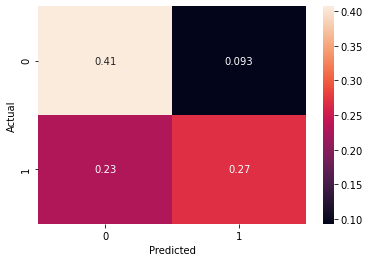

In [66]:
# get actual and create heatmap 
confusion_matrix = pd.crosstab(actual, predictions , rownames=['Actual'], colnames=['Predicted'], normalize=True)
plt.subplots(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True)

## Question 2(g): Logistic Regression

### Part 1: Ridge Regression

In [67]:
#another way to put the data - it gets the same results
# train_x_ridge = df_train['feature_vector_array']
# test_x_ridge = df_test['feature_vector_array']

# train_x_ridge = pd.DataFrame(train_x_ridge.to_list()).to_numpy()
# test_x_ridge = pd.DataFrame(test_x_ridge.to_list()).to_numpy()

# train_y_ridge = train_Y
# test_y_ridge = test_Y

In [68]:
unique_words_list = list(word_freq.keys())

In [69]:
train_X_feat_vect = pd.DataFrame(df_train['feature_vector_array'].to_list())
train_X_feat_vect.columns = list(word_freq.keys())
test_X_feat_vect = pd.DataFrame(df_test['feature_vector_array'].to_list())
test_X_feat_vect.columns = list(word_freq.keys())

In [70]:
model_ridge = LogisticRegressionCV(cv=10, penalty='l2', solver='liblinear').fit(train_X_feat_vect, train_Y)

In [71]:
model_ridge.predict(test_X_feat_vect)

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,

In [72]:
model_ridge.score(test_X_feat_vect, test_Y)

0.685

#### Most and least important words for the ridge resgression:

In [73]:
model_ridge.coef_
coeffs_ridge = list(np.argsort(model_ridge.coef_))

In [74]:
# most important words:
most_important = coeffs_ridge[0][::-1]
for i in range(0,10):
    print(unique_words_list[most_important[i]])

delici
great
good
fantast
amaz
pretti
staff
fresh
vega
waitress


In [75]:
least_important = coeffs_ridge[0]
for i in range(0,10):
    print(unique_words_list[least_important[i]])

bad
minut
one
nt
wait
worst
rude
suck
3
expect


### Part 2: Lasso

In [76]:
model_lasso = LogisticRegressionCV(cv=10, penalty='l1', solver='liblinear').fit(train_X_feat_vect, train_Y)

C:\Users\ophir\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [77]:
model_lasso.predict(test_X_feat_vect)

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [78]:
model_lasso.score(test_X_feat_vect, test_Y)

0.6666666666666666

## Question 2(h)

#### Build a dictionary of n-gram (n=2):

In [79]:
# df_train_ngram

In [80]:
# create a list of all two consecutive words in all rows in the dataframe: 
list_consecutive = []
for row in range(0, len(df_train['sentence'])):
    sentence = df_train['sentence'][row]
    word_list = df_train['sentence'][row].split()
    i=0
    while i < len(word_list)-1:
        if (word_list[i] + ' ' + word_list[i+1]) not in list_consecutive:
            list_consecutive.append(word_list[i]+ ' ' + word_list[i+1])
            i+=1
        else:
            i+=1

In [81]:
# len(list_consecutive) #self-check

In [82]:
#make list of consecutive into a dictionary
ngram_dict = dict.fromkeys(list_consecutive, 0)

### Repeat 2(d):

In [83]:
#function that return the two consecutive for every row in the dataframe:
def consecutive(sentence):
    list_cons_per_row = []
    word_list = sentence.split()
    i=0
    while i < len(word_list)-1:
        if (word_list[i] + ' ' + word_list[i+1]) not in list_cons_per_row:
            list_cons_per_row.append(word_list[i]+ ' ' + word_list[i+1])
            i+=1
        else:
            i+=1
    return(list_cons_per_row)

In [84]:
# word_list_3 = consecutive(df_train['sentence'][3])

In [85]:
# for word in word_list_3:
#     print(word)

In [86]:
def feature_vector_func_ngram(sentence):
    feature_vector = {x:0 for x in ngram_dict}
    word_list = consecutive(sentence)
    counter = 0
    for word in word_list:
        if word in ngram_dict:
            feature_vector[word] = counter + 1
        else:
            feature_vector[word] = counter
    return(feature_vector)

In [87]:
df_train_ngram['feature_vector_dict_ngram'] = df_train_ngram['sentence'].apply(lambda x: feature_vector_func_ngram(x))

In [88]:
df_train_ngram.head()

,sentence,label,feature_vector_dict_ngram
0,go far mani place never seen restaur serf 1 eg...,0,"{'go far': 1, 'far mani': 1, 'mani place': 1, ..."
1,delici absolut back,1,"{'go far': 0, 'far mani': 0, 'mani place': 0, ..."
2,over like place lot,1,"{'go far': 0, 'far mani': 0, 'mani place': 0, ..."
3,fantast servic,0,"{'go far': 0, 'far mani': 0, 'mani place': 0, ..."
4,im az time new spot,1,"{'go far': 0, 'far mani': 0, 'mani place': 0, ..."


#### Applying the function to all rows in the same manner for df_test:

In [89]:
df_test_ngram['feature_vector_dict_ngram'] = df_test_ngram['sentence'].apply(lambda x: feature_vector_func_ngram(x))

In [90]:
df_test_ngram.head()

,sentence,label,feature_vector_dict_ngram
0,close hous lowkey nonfanc afford price good food,1,"{'go far': 0, 'far mani': 0, 'mani place': 0, ..."
1,bad day low toler rude custom servic peopl job...,0,"{'go far': 0, 'far mani': 0, 'mani place': 0, ..."
2,nt mani word say place doe everyth pretti well,1,"{'go far': 0, 'far mani': 0, 'mani place': 0, ..."
3,thing wa nt crazi wa guacamol nt like puré,0,"{'go far': 0, 'far mani': 0, 'mani place': 0, ..."
4,want first say server wa great perfect servic,1,"{'go far': 0, 'far mani': 0, 'mani place': 0, ..."


#### Compare any two feature vectors of any two reviews in the training set:

In [91]:
df_train_ngram['feature_vector_dict_ngram'][:2]

0    {'go far': 1, 'far mani': 1, 'mani place': 1, ...
1    {'go far': 0, 'far mani': 0, 'mani place': 0, ...
Name: feature_vector_dict_ngram, dtype: object

### Repeat 2(e) - Postprocessing Strategy with ngram

#### For the train data:

In [92]:
df_train_ngram['feature_vector_array_ngram'] = df_train_ngram['feature_vector_dict_ngram'].apply(lambda x: dict_to_array(x))

In [93]:
df_train_ngram.head()

,sentence,label,feature_vector_dict_ngram,feature_vector_array_ngram
0,go far mani place never seen restaur serf 1 eg...,0,"{'go far': 1, 'far mani': 1, 'mani place': 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ..."
1,delici absolut back,1,"{'go far': 0, 'far mani': 0, 'mani place': 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ..."
2,over like place lot,1,"{'go far': 0, 'far mani': 0, 'mani place': 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
3,fantast servic,0,"{'go far': 0, 'far mani': 0, 'mani place': 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,im az time new spot,1,"{'go far': 0, 'far mani': 0, 'mani place': 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [94]:
df_train_ngram['standard_array_ngram'] = df_train_ngram['feature_vector_array_ngram'].apply(lambda x: standard(x))

#### For the test data:

In [95]:
df_test_ngram['feature_vector_array_ngram'] = df_test_ngram['feature_vector_dict_ngram'].apply(lambda x: dict_to_array(x))
df_test_ngram['standard_array_ngram'] = df_test_ngram['feature_vector_array_ngram'].apply(lambda x: standard(x))

In [96]:
len(df_test_ngram['standard_array_ngram'][0])

3798

### Reapeat 2(f) - Sentiment Prediction

Train a naive Bayes model on the training set and test on the testing set. 

Report the classification accuracy and confusion matrix.

In [97]:
df_train_ngram['standard_array_clean_ngram'] = df_train_ngram['standard_array_ngram'].apply(lambda x: array_of_arrays(x))
df_test_ngram['standard_array_clean_ngram'] = df_test_ngram['standard_array_ngram'].apply(lambda x: array_of_arrays(x))

In [98]:
len(df_test_ngram['standard_array_clean_ngram'][0])

3798

In [142]:
train_X_ngram = df_train_ngram["standard_array_clean_ngram"]
test_X_ngram = df_test_ngram["standard_array_clean_ngram"]

In [143]:
#Check that there is no "Nan" values:
for array in test_X_ngram:
    array_sum = np.sum(array)
    array_has_nan = np.isnan(array_sum)
print(array_has_nan)

False


In [144]:
#False = no "Nan" values!

In [145]:
train_X_ngram = pd.DataFrame(train_X_ngram.to_list())
# train_X_ngram = train_X_ngram.loc[:, :3753]

In [146]:
#Check again - no "Nan" values
for array in test_X_ngram:
    array_sum = np.sum(array)
    array_has_nan = np.isnan(array_sum)
print(array_has_nan)

False


In [147]:
train_X_ngram = train_X_ngram.to_numpy()

In [148]:
train_X_ngram.shape[1] #works well

3796

In [149]:
test_X_ngram = pd.DataFrame(test_X_ngram.to_list())
test_X_ngram #I see there is redundant data - drop all columns after 3796

,0,1,2,3,4,5,6,7,8,9,...,3797,3798,3799,3800,3801,3802,3803,3804,3805,3806
0,-0.036307,-0.036307,-0.036307,-0.036307,-0.036307,-0.036307,-0.036307,-0.036307,-0.036307,-0.036307,...,-0.036307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.056306,-0.056306,-0.056306,-0.056306,-0.056306,-0.056306,-0.056306,-0.056306,-0.056306,-0.056306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.045956,-0.045956,-0.045956,-0.045956,-0.045956,-0.045956,-0.045956,-0.045956,-0.045956,-0.045956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.022942,-0.022942,-0.022942,-0.022942,-0.022942,-0.022942,-0.022942,-0.022942,-0.022942,-0.022942,...,-0.022942,-0.022942,-0.022942,-0.022942,-0.022942,NaN,NaN,NaN,NaN,NaN
4,-0.028109,-0.028109,-0.028109,-0.028109,-0.028109,-0.028109,-0.028109,-0.028109,-0.028109,-0.028109,...,-0.028109,-0.028109,-0.028109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,-0.036317,-0.036317,-0.036317,-0.036317,-0.036317,-0.036317,-0.036317,-0.036317,-0.036317,-0.036317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
#dropping redundant columns
test_X_ngram = test_X_ngram.loc[:, :3795]

In [151]:
#check again:
test_X_ngram

,0,1,2,3,4,5,6,7,8,9,...,3786,3787,3788,3789,3790,3791,3792,3793,3794,3795
0,-0.036307,-0.036307,-0.036307,-0.036307,-0.036307,-0.036307,-0.036307,-0.036307,-0.036307,-0.036307,...,-0.036307,-0.036307,-0.036307,-0.036307,-0.036307,-0.036307,-0.036307,-0.036307,-0.036307,-0.036307
1,-0.056306,-0.056306,-0.056306,-0.056306,-0.056306,-0.056306,-0.056306,-0.056306,-0.056306,-0.056306,...,-0.056306,-0.056306,-0.056306,-0.056306,-0.056306,-0.056306,-0.056306,-0.056306,-0.056306,-0.056306
2,-0.045956,-0.045956,-0.045956,-0.045956,-0.045956,-0.045956,-0.045956,-0.045956,-0.045956,-0.045956,...,-0.045956,-0.045956,-0.045956,-0.045956,-0.045956,-0.045956,-0.045956,-0.045956,-0.045956,-0.045956
3,-0.022942,-0.022942,-0.022942,-0.022942,-0.022942,-0.022942,-0.022942,-0.022942,-0.022942,-0.022942,...,-0.022942,-0.022942,-0.022942,-0.022942,-0.022942,-0.022942,-0.022942,-0.022942,-0.022942,-0.022942
4,-0.028109,-0.028109,-0.028109,-0.028109,-0.028109,-0.028109,-0.028109,-0.028109,-0.028109,-0.028109,...,-0.028109,-0.028109,-0.028109,-0.028109,-0.028109,-0.028109,-0.028109,-0.028109,-0.028109,-0.028109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
596,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
598,-0.036317,-0.036317,-0.036317,-0.036317,-0.036317,-0.036317,-0.036317,-0.036317,-0.036317,-0.036317,...,-0.036317,-0.036317,-0.036317,-0.036317,-0.036317,-0.036317,-0.036317,-0.036317,-0.036317,-0.036317


In [152]:
#check there is no "Nan" values
for array in test_X_ngram:
    array_sum = np.sum(array)
    array_has_nan = np.isnan(array_sum)
print(array_has_nan)

False


In [153]:
#False - we can continue:
test_X_ngram = test_X_ngram.to_numpy()

In [154]:
test_X_ngram.shape

(600, 3796)

In [155]:
train_Y_ngram = df_train['label']
test_Y_ngram = df_test['label']

In [156]:
n = train_X_ngram.shape[0] #number of rows
d = train_X_ngram.shape[1] #number of unique words = features in feature vector
K = 2 #number of classes - label 1 or label 0

psis = np.zeros([K,d])
phis = np.zeros([K])

In [157]:
for k in range(K):
    X_k_ngram = train_X_ngram[train_Y_ngram == k]
    phis[k] = X_k_ngram.shape[0] / float(n)
    psis[k] = np.mean(X_k_ngram, axis=0) #build a function with the mean for label 0 and mean for label 0 as an array

In [158]:
print(psis.shape, phis.shape, train_X_ngram.shape)

(2, 3796) (2,) (2400, 3796)


In [159]:
# implement this in numpy
def nb_predictions(x, psis, phis):
    """This returns class assignments and scores under the NB model.
    
    We compute \arg\max_y p(y|x) as \arg\max_y p(x|y)p(y)
    """
    # adjust shapes
    n , d = x.shape
    x = np.reshape(x, (1,n,d))
    psis = np.reshape(psis, (K, 1, d))
    
    # clip probabilities to avoid log(0)
    psis = psis.clip(1e-14, 1-1e-14) #understand
    
    # compute log-probabilities
    logpy = np.log(phis).reshape(K,1)
    logpxy = x * np.log(psis) + (1-x) * np.log(1-psis)
    logpyx = logpxy.sum(axis=2) + logpy

    return logpyx.argmax(axis=0).flatten(), logpyx.reshape([K,n])

### Naive Bayes on the Training Dataset

In [160]:
predicted_train_ngram, logpyx_ngram = nb_predictions(train_X_ngram, psis, phis)

In [161]:
# for i in predicted_train_ngram:
#     if i != 0:
#         print(i)

### Accuracy Calculation:

In [162]:
(predicted_train_ngram == train_Y_ngram).mean()

0.7266666666666667

### Naive Bayes on the Test Dataset

In [163]:
predicted_test_ngram, logpyx_test = nb_predictions(test_X_ngram, psis, phis)

### Accuracy for test data:

In [164]:
(predicted_test_ngram == test_Y_ngram).mean()

0.5766666666666667

### Confusion matrix:

In [165]:
actual_ngram = test_Y_ngram
predictions_ngram = predicted_test_ngram

In [166]:
actual_ngram.shape

(600,)

In [167]:
predictions_ngram.shape

(600,)

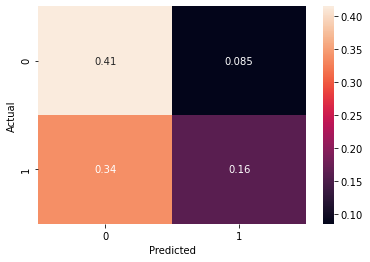

In [168]:
# get actual and create heatmap 
confusion_matrix_ngram = pd.crosstab(actual_ngram, predictions_ngram , rownames=['Actual'], colnames=['Predicted'], normalize=True)
plt.subplots(figsize=(6, 4))
sns.heatmap(confusion_matrix_ngram, annot=True)

### Repeat 2(g): Logistic Regression

#### Part 1: Ridge Regression

In [170]:
train_X_feat_vect_ngram = pd.DataFrame(df_train_ngram['feature_vector_array_ngram'].to_list())
train_X_feat_vect_ngram.columns = list(ngram_dict.keys())
test_X_feat_vect_ngram = pd.DataFrame(df_test_ngram['feature_vector_array_ngram'].to_list())
test_X_feat_vect_ngram = test_X_feat_vect_ngram.loc[:, :3795]
test_X_feat_vect_ngram.columns = list(ngram_dict.keys())

In [171]:
model_ridge_ngram = LogisticRegressionCV(cv=10, penalty='l2', solver='liblinear').fit(train_X_feat_vect_ngram, train_Y_ngram)

In [172]:
model_ridge_ngram.predict(test_X_feat_vect_ngram)

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,

In [173]:
model_ridge_ngram.score(test_X_feat_vect_ngram, test_Y_ngram)

0.6033333333333334

#### Most and least important words for the ridge resgression:

In [174]:
model_ridge_ngram.coef_
coeffs_ridge_ngram = list(np.argsort(model_ridge_ngram.coef_))

In [175]:
list_ngram = list(ngram_dict.keys())

In [176]:
# most important words:
most_important_ngram = coeffs_ridge_ngram[0][::-1]
for i in range(0,10):
    print(list_ngram[most_important[i]])

absolut back
3 time
food wa
az time
chicken dish
green heart
worth price
feel like
burger friend
good though


In [177]:
least_important_ngram = coeffs_ridge_ngram[0]
for i in range(0,10):
    print(list_ngram[least_important[i]])

come back
best chee
wa incr
ice tea
time food
ravoli chicken
duck wa
mussel cook
probabl wo
wa greatest


### Part 2: Lasso

In [178]:
model_lasso_ngram = LogisticRegressionCV(cv=10, penalty='l1', solver='liblinear').fit(train_X_feat_vect_ngram, train_Y_ngram)

In [179]:
model_lasso_ngram.predict(test_X_feat_vect_ngram)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [180]:
model_lasso_ngram.score(test_X_feat_vect_ngram, test_Y_ngram)

0.5266666666666666

## Algorithm Comparison and Analysis

According to the above results, compare the performances of naive Bayes, logistic regression, naive Bayes with 2-grams, and logistic regression
with 2-grams. Which method performs best in the prediction task and why? What do you
learn about the language that people use in online reviews (e.g., expressions that will make
the posts positive/negative)? Hint: Inspect the weights learned from logistic regression.

### Answer

In general - part (1) is better than part (2).

In n-gram model:
    lasso accuracy < ridge accuracy because Lasso penalizes for many features.

# IGNORE - QUESTIONS FOR ME 

#### Lasso & Ridge - do twice the importance of words or once? weird results for lasso

In [ ]:
model_lasso.coef_
coeffs_lasso = list(np.argsort(model_lasso.coef_))
# print(coeffs_lasso)

In [ ]:
# most important words:
most_important_lasso = coeffs_lasso[0][::-1]
for i in range(0,10):
    print(unique_words_list[most_important[i]])

In [ ]:
least_important = coeff[0]
for i in range(0,10):
    print(unique_words_list[least_important[i]])

#  *** Why is all of that not giving me good scores? How is it differentthan the ridge part? *** 

## Choosing alpha vs. not

In [ ]:
# Ridge regression with 10-fold cross validation to chose ¸
# The Ridge() function has an alpha argument ( λ , but with a different name!) that is used to tune the model
# Alpha values ranging from very big to very small, essentially covering the full 
# range of scenarios from the null model containing only the intercept, to the least squares fit

alphas = 10**np.linspace(10,-2,100)*0.5 

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(train_x_ridge, train_y_ridge)
ridgecv.alpha_

ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge.fit(train_x_ridge, train_y_ridge)
mean_squared_error(test_y_ridge, ridge.predict(test_x_ridge))

In [ ]:
# Ridge regression with 10-fold cross validation to chose ¸
# The Ridge() function has an alpha argument ( λ , but with a different name!) that is used to tune the model
# Alpha values ranging from very big to very small, essentially covering the full 
# range of scenarios from the null model containing only the intercept, to the least squares fit

alphas = 10**np.linspace(10,-2,100)*0.5 

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(train_X_feat_vect, train_Y)
ridgecv.alpha_

ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge.fit(train_X_feat_vect, train_Y)
mean_squared_error(test_Y, ridge.predict(test_X_feat_vect))

In [ ]:
# ridge.predict(test_x_ridge)

In [ ]:
ridge.score(train_x_ridge, train_y_ridge)

In [ ]:
ridgereg = Ridge(alpha=1.0,normalize=True)
ridgereg.fit(train_x_ridge, train_y_ridge)
y_predict = ridgereg.predict(train_x_ridge)

## How is this different than the other ridge?

In [ ]:
clf = RidgeClassifier().fit(train_x_ridge, train_y_ridge)
clf.score(train_x_ridge, train_y_ridge)

#### Accuracy for the test data:

In [ ]:
clf = RidgeClassifier().fit(test_x_ridge, test_y_ridge)       # clf = Ridge(alpha=1.0)
clf.score(test_x_ridge, test_y_ridge)